## Make a program to choose randomly p fraction of the population to infect initially
* Randomly with choosen probability picks 0 and 1 
* We find list of all unique users and then we need to infect a percentage of population
* Again a problem here is that we need to start infecting users only after a particular time
* we need to make this set to be positive or negative

**I propose that there could be atleast two mechanism to start infection**
1. Randomly infect people by choosing them after a particular time
2. Randomly infect people by choosing a particular place at particular time (this is how COVID started)
3. If choosing step 2 then we can randmly infect people who were at that place at a particular time
4. Using alpha as infection rate

In [1]:
import pandas as pd
df = pd.read_csv("processedTMSC2014.tsv",sep='\t', engine="python")
df.drop(["Unnamed: 0"],axis=1, inplace=True)

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

from arcgis.gis import GIS
from arcgis.features import GeoAccessor, GeoSeriesAccessor

/home/mayuresh/anaconda3/lib/python3.7/site-packages/arcgis/features/_data/geodataset/utils.py:16: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  pd.datetime,


# EXTRA IDEAS
## We can use venue catorgories to define the probabilty of infection
* If it is a closed space we can have more probability 
* If it is public space which is frequented by many we can give more probability
* Also we can give probability of contamination by looking at how many people were there at the place at given time

In [3]:
df

,User ID (anonymized),Venue ID (Foursquare),Venue category ID (Foursquare),Venue category name (Fousquare),Latitude,Longitude,Timezone offset(minutes),UTC time,Status,Iteration,InfectorId,InfectionTime,Time
0,470,49bbd6c0f964a520f4531fe3,4bf58dd8d48988d127951735,Arts & Crafts Store,40.719810,-74.002581,-240,Tue Apr 03 18:00:09 +0000 2012,0,0,0,0,1333476009
1,979,4a43c0aef964a520c6a61fe3,4bf58dd8d48988d1df941735,Bridge,40.606800,-74.044170,-240,Tue Apr 03 18:00:25 +0000 2012,0,0,0,0,1333476025
2,69,4c5cc7b485a1e21e00d35711,4bf58dd8d48988d103941735,Home (private),40.716162,-73.883070,-240,Tue Apr 03 18:02:24 +0000 2012,0,0,0,0,1333476144
3,395,4bc7086715a7ef3bef9878da,4bf58dd8d48988d104941735,Medical Center,40.745164,-73.982519,-240,Tue Apr 03 18:02:41 +0000 2012,0,0,0,0,1333476161
4,87,4cf2c5321d18a143951b5cec,4bf58dd8d48988d1cb941735,Food Truck,40.740104,-73.989658,-240,Tue Apr 03 18:03:00 +0000 2012,0,0,0,0,1333476180
...,...,...,...,...,...,...,...,...,...,...,...,...,...
227423,688,3fd66200f964a52000e71ee3,4bf58dd8d48988d1e7931735,Music Venue,40.733596,-74.003139,-300,Sat Feb 16 02:29:11 +0000 2013,0,0,0,0,1360981751
227424,560,4bca32ff0687ef3be789dbcc,4bf58dd8d48988d16c941735,Burger Joint,40.745719,-73.993720,-300,Sat Feb 16 02:31:35 +0000 2013,0,0,0,0,1360981895
227425,945,50a77716e4b0b5a9492f6f56,4bf58dd8d48988d103941735,Home (private),40.854364,-73.883070,-300,Sat Feb 16 02:33:16 +0000 2013,0,0,0,0,1360981996
227426,671,4514efe0f964a520e7391fe3,4bf58dd8d48988d11d941735,Bar,40.735981,-74.029309,-300,Sat Feb 16 02:34:31 +0000 2013,0,0,0,0,1360982071


# We find all the unique users from whole dataset

In [4]:
import numpy as np

#choosing unique users from list of all user IDs
unique_users =  pd.unique(df["User ID (anonymized)"])#.

print(f"Number of unique users are: {len(unique_users)}")

Number of unique users are: 1083


# Only first few users are active so only infect from them

Below cell infects from users before present before infect time

In [5]:
##############################################################################
# DON' RUN THIS CELL IF YOU WANT TO RANDOMLY INFECT USERS FROM WHOLE DATASET #
##############################################################################

#THIS CELL IS TO SELECTED ONLY UNIQUE USERS FROM FIRST 2000 CELL
unique_users =  pd.unique((df[:2001])["User ID (anonymized)"])
unique_users
len(unique_users)

613

# Randomly select 10% users to be infected

In [6]:
import datetime
#intial infected percentage
alpha = 0.1

# this is when we are infecting people after a particular time
gen_positive = np.random.choice((1,0),size = len(unique_users), p=[alpha, 1-alpha])

#Choosing the time at which infection begins
infect_time = df.iloc[2000]["Time"]
print(f"Infection time in epoch {infect_time}")
print(f"Infection starts on : {datetime.datetime.fromtimestamp(infect_time).strftime('%c')}")

infections = np.sum(gen_positive)
print(f"Number of infected users: {infections}")

Infection time in epoch 1333559854
Infection starts on : Wed Apr  4 10:17:34 2012
Number of infected users: 52


In [7]:
print(gen_positive,len(gen_positive))
print(unique_users, len(unique_users))

[0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1
 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

# Find all rows of infected users for further infections

In [8]:
#############################
# NO INFECTED CELL TILL NOW #
#############################

df[df["Status"]==1]

,User ID (anonymized),Venue ID (Foursquare),Venue category ID (Foursquare),Venue category name (Fousquare),Latitude,Longitude,Timezone offset(minutes),UTC time,Status,Iteration,InfectorId,InfectionTime,Time


In [9]:
#Query logic to select only those users whose user id and time matches or those who are positive already
for i in range(len(unique_users)):
    #print(i)
    if gen_positive[i] == 1:
        #Below query gives sets status to 1 if infected userId and time condition matches
        #df["Status"]= np.where( ( (df["User ID (anonymized)"] == unique_users[i]) & (df["Time"] >= infect_time) ) | (df["Status"] == 1),1,0)
        
        #Below query sets Status of all rows of infected user to be equal to 1 otherwise 0
        # | (df["Status"] == 1) this condition helps retain previous set rows, else it will reset to 0
        df["Status"]= np.where((df["User ID (anonymized)"] == unique_users[i]) | (df["Status"] == 1) ,1,0)

In [10]:
##############################
# ALL INFECTED CELL TILL NOW #
##############################
df[df["Status"]==1]

,User ID (anonymized),Venue ID (Foursquare),Venue category ID (Foursquare),Venue category name (Fousquare),Latitude,Longitude,Timezone offset(minutes),UTC time,Status,Iteration,InfectorId,InfectionTime,Time
4,87,4cf2c5321d18a143951b5cec,4bf58dd8d48988d1cb941735,Food Truck,40.740104,-73.989658,-240,Tue Apr 03 18:03:00 +0000 2012,1,0,0,0,1333476180
5,484,4b5b981bf964a520900929e3,4bf58dd8d48988d118951735,Food & Drink Shop,40.690427,-73.954687,-240,Tue Apr 03 18:04:00 +0000 2012,1,0,0,0,1333476240
10,87,4d8263a73e916dcb8edd80d2,4bf58dd8d48988d155941735,Gastropub,40.743483,-73.994009,-240,Tue Apr 03 18:07:15 +0000 2012,1,0,0,0,1333476435
18,895,4bb7e0c41261d13a8707e898,4bf58dd8d48988d1e0931735,Coffee Shop,40.906627,-73.777774,-240,Tue Apr 03 18:11:16 +0000 2012,1,0,0,0,1333476676
55,15,4b0d88b2f964a5206d4a23e3,4bf58dd8d48988d1dd931735,Soup Place,40.785679,-73.972834,-240,Tue Apr 03 18:33:49 +0000 2012,1,0,0,0,1333478029
...,...,...,...,...,...,...,...,...,...,...,...,...,...
227199,392,4aeb7568f964a52043c221e3,4bf58dd8d48988d110941735,Italian Restaurant,40.769354,-73.962981,-300,Thu Feb 14 01:59:47 +0000 2013,1,0,0,0,1360807187
227256,599,3fd66200f964a520dae51ee3,4bf58dd8d48988d118941735,Bar,40.737795,-74.001846,-300,Thu Feb 14 04:28:43 +0000 2013,1,0,0,0,1360816123
227299,837,4cce2240aa25a35dcb3b1f0f,4bf58dd8d48988d116941735,Bar,40.629034,-74.005381,-300,Thu Feb 14 06:24:26 +0000 2013,1,0,0,0,1360823066
227336,837,4cdfbb30db125481e0e338ce,4bf58dd8d48988d145941735,Chinese Restaurant,40.636262,-74.008666,-300,Thu Feb 14 11:11:27 +0000 2013,1,0,0,0,1360840287


# This is where infection starts

* set all initial users InfectionTime to infect_time
* set the number of infecting days i.e. 21 here as viral_day
* set tested time to be equal to the upper limit of viral time in epoch time

In [11]:
# Setting infection time for all
df["InfectionTime"] = np.where(df["Status"]==1,infect_time,0)

# We set testing time to be 7 days after infection time
viral_day = 21

df["TestedTime"] = np.where(df["Status"]==1,infect_time + viral_day*24*60*60,0)

count_infected = len(df[df["Status"]==1])
print(f"number of infect rows: {count_infected}")

number of infect rows: 11205


In [12]:
# Looking at the first 10 values to see the information to ascertain work done
df[df["Status"]==1]

,User ID (anonymized),Venue ID (Foursquare),Venue category ID (Foursquare),Venue category name (Fousquare),Latitude,Longitude,Timezone offset(minutes),UTC time,Status,Iteration,InfectorId,InfectionTime,Time,TestedTime
4,87,4cf2c5321d18a143951b5cec,4bf58dd8d48988d1cb941735,Food Truck,40.740104,-73.989658,-240,Tue Apr 03 18:03:00 +0000 2012,1,0,0,1333559854,1333476180,1335374254
5,484,4b5b981bf964a520900929e3,4bf58dd8d48988d118951735,Food & Drink Shop,40.690427,-73.954687,-240,Tue Apr 03 18:04:00 +0000 2012,1,0,0,1333559854,1333476240,1335374254
10,87,4d8263a73e916dcb8edd80d2,4bf58dd8d48988d155941735,Gastropub,40.743483,-73.994009,-240,Tue Apr 03 18:07:15 +0000 2012,1,0,0,1333559854,1333476435,1335374254
18,895,4bb7e0c41261d13a8707e898,4bf58dd8d48988d1e0931735,Coffee Shop,40.906627,-73.777774,-240,Tue Apr 03 18:11:16 +0000 2012,1,0,0,1333559854,1333476676,1335374254
55,15,4b0d88b2f964a5206d4a23e3,4bf58dd8d48988d1dd931735,Soup Place,40.785679,-73.972834,-240,Tue Apr 03 18:33:49 +0000 2012,1,0,0,1333559854,1333478029,1335374254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227199,392,4aeb7568f964a52043c221e3,4bf58dd8d48988d110941735,Italian Restaurant,40.769354,-73.962981,-300,Thu Feb 14 01:59:47 +0000 2013,1,0,0,1333559854,1360807187,1335374254
227256,599,3fd66200f964a520dae51ee3,4bf58dd8d48988d118941735,Bar,40.737795,-74.001846,-300,Thu Feb 14 04:28:43 +0000 2013,1,0,0,1333559854,1360816123,1335374254
227299,837,4cce2240aa25a35dcb3b1f0f,4bf58dd8d48988d116941735,Bar,40.629034,-74.005381,-300,Thu Feb 14 06:24:26 +0000 2013,1,0,0,1333559854,1360823066,1335374254
227336,837,4cdfbb30db125481e0e338ce,4bf58dd8d48988d145941735,Chinese Restaurant,40.636262,-74.008666,-300,Thu Feb 14 11:11:27 +0000 2013,1,0,0,1333559854,1360840287,1335374254


# We need to do following
* We need to find every person that has been infected
* for every person that has been infected we need to find the other person who was at same place and time range
* infect these people with certain probability
* we need to make the person either dead(8%) or cured(92%) after 21 days (7 days testing, 14 days incubation)

In [13]:
# Find all the infected users
infected_users_dataframe = df[df["Status"]==1]
infected_users = pd.unique(infected_users_dataframe["User ID (anonymized)"])
print("Infected Users are: ")
print(infected_users)
#count number of infections
infections = len(infected_users)
print(f"Total infections are: {infections}")
# Infection list stores list of infected people per round of simulation
infection_list = []
infection_list.append(infected_users)

Infected Users are: 
[  87  484  895   15  366  227  504  950  467  636 1063  725  184  528
  710  145  662  425   84  204   49 1034  258    4  444  125  221  772
  955  475  215 1040  530  218  287    3  599  797  884  501  922  392
  837  439 1018  762  579  190  499  298  305 1073]
Total infections are: 52


In [14]:
#############################################################
# This code is to check if the given code generates correct #
#############################################################
#infected_rows = len(infected_users_dataframe)
#for i in range(infected_rows):
#    infector = infected_users_dataframe.iloc[i]
#    #print(infector)
#    x = list(np.where( (df["Latitude"] == infector["Latitude"]) & (df["Longitude"] == infector["Longitude"]) & ( (df["Time"] >= (infector["Time"]-3600)) & (df["Time"] <= (infector["Time"]+7200)) ))[0])
#    if(len(x)>1):
#        print(x)
#        print(i)

In [15]:
# We need to find all the users who where at the same place as the infected user and in time range of 1 hrs
# 1hr = 3600 seconds
# ITERATING OVER ALL ROWS AND CHECKING TIME
iteration_count = 0
while(infections!=0):
    # we will maintain this variable to fetch only new infections
    print("#############################################################################")
    print("#############################################################################")
    print("#############################################################################")
    infected_rows = len(infected_users_dataframe)
    for i in range(infected_rows):
        print(f"Calculating for infected person: {i} of {infected_rows}")
        infector = infected_users_dataframe.iloc[i]
        
        ##print("Infector is:")
        ##print("###################################################################")
        ##print(infector)
        ##print("###################################################################")
        
        #Cured  or Dead person cannot effect
        if(infector["TestedTime"]< infector["Time"]): 
            print("This person has either been cured or dead... thence no effect!")
            continue
        
        
        # Finding all those prople infector meets after start of infection time
        # meeting_population =  list(np.where( (df["Latitude"] == infector["Latitude"]) & (df["Longitude"] == infector["Longitude"])  & (df["Time"] >= infect_time))[0])
        
        # Finding all people that infector meets at infectors time range
        # Meeting Population is the list of indices of the people, not the User Id (anonymized)
        # We are keeping 3 hours time window -2 +4
        
        meeting_population =  list(np.where( (df["Latitude"] == infector["Latitude"]) & (df["Longitude"] == infector["Longitude"]) & ( (df["Time"] >= (infector["Time"]-7200)) & (df["Time"] <= (infector["Time"]+14400)) ))[0])
        
        print("List of people this infector meets: "+str({len(meeting_population)})) 
        ##print(meeting_population)
        ##print(meeting_population)
        
        for index in meeting_population:
            person = df.iloc[index]
            if(person["Status"]==0):
                
                print(f"Non infected person met.................{index}")
                ##print("In range.............................")
                #Find all the entries of this person after this time and set details
                
                person_rows = np.where( (df["User ID (anonymized)"]==person["User ID (anonymized)"]) & (df["Time"]>=person["Time"]))[0]
                
                ##print("Places where this person has rows")
                ##print(f"Rows of person is : {len(person_rows)}")
                
                # TO MAKE MORE EFFIECIENT
                # https://stackoverflow.com/questions/49447233/python-maintain-multiple-columns-with-np-where
                for k in range(len(person_rows)):
                    df.at[index, "Status"] = 1
                    #print("Status Set")
                    df.at[index, "InfectorId"] = infector["User ID (anonymized)"]
                    #print("Infector Id Set")
                    df.at[index, "InfectionTime"] = person["Time"]
                    #print("Infection Time Set")
                    df.at[index, "TestedTime"] = person["Time"] + viral_day*24*60*60
                    #print("Tested Time Set")
                    df.at[index, "Iteration"] = iteration_count+1
                    #print(df.iloc[index])
                    #print(df)
                    df.at[index, "InfectionLongitude"] = infector["Longitude"]
                    df.at[index, "InfectionLatitude"] = infector["Latitude"]
            else:
                print(f"Met with an already infected person.................{index}")
                #If this person was infected later than when they meets this new infector then update
                if(person["InfectionTime"] > person["Time"]):
                    print("Resetting infector ID... new infector found for infected person")
                    person_rows = np.where( (df["User ID (anonymized)"]==person["User ID (anonymized)"]) & (df["Time"]>=person["Time"]))[0]
                    for k in range(len(person_rows)):
                        #df.at[index, "Status"] = 1
                        #print("Status Set")
                        df.at[index, "InfectorId"] = infector["User ID (anonymized)"]
                        #print("Infector Id Set")
                        df.at[index, "InfectionTime"] = person["Time"]
                        #print("Infection Time Set")
                        df.at[index, "TestedTime"] = person["Time"] + viral_day*24*60*60
                        #print("Tested Time Set")
                        df.at[index, "Iteration"] = iteration_count+1
                        #print(df.iloc[index])
                        #print(df)
                        df.at[index, "InfectionLongitude"] = infector["Longitude"]
                        df.at[index, "InfectionLatitude"] = infector["Latitude"]                    
                
    # Find all the infected users
    # HERE WE MUST ALSO SET CONDITIONS BASED ON ITERATION, FETCH ONLY THAT WERE INFECTED IN THIS ITERATION
    iteration_count += 1
    print(f"Finding new Infections............................Iteration {iteration_count}")
    infected_users_dataframe = df[(df["Status"]==1) & (df["Iteration"]==iteration_count)]
    infected_users = pd.unique(infected_users_dataframe["User ID (anonymized)"])
    infection_list.append(infected_users)
    ##print("Infected Users are: ")
    ##print(infected_users)
    #count number of infections
    print("Infected Users are: ")
    print(infected_users)
    infections = len(infected_users)
    print(f"Total new infections are: {infections} for iteration {iteration_count}") 
    print("#############################################################################")
    print("#############################################################################")
    print("#############################################################################")

df

#############################################################################
#############################################################################
#############################################################################
Calculating for infected person: 0 of 11205
List of people this infector meets: {1}
Met with an already infected person.................4
Resetting infector ID... new infector found for infected person
Calculating for infected person: 1 of 11205
List of people this infector meets: {1}
Met with an already infected person.................5
Resetting infector ID... new infector found for infected person
Calculating for infected person: 2 of 11205
List of people this infector meets: {1}
Met with an already infected person.................10
Resetting infector ID... new infector found for infected person
Calculating for infected person: 3 of 11205
List of people this infector meets: {1}
Met with an already infected person.................18
Resetting infector I

Calculating for infected person: 38 of 11205
List of people this infector meets: {1}
Met with an already infected person.................358
Resetting infector ID... new infector found for infected person
Calculating for infected person: 39 of 11205
List of people this infector meets: {1}
Met with an already infected person.................373
Resetting infector ID... new infector found for infected person
Calculating for infected person: 40 of 11205
List of people this infector meets: {1}
Met with an already infected person.................374
Resetting infector ID... new infector found for infected person
Calculating for infected person: 41 of 11205
List of people this infector meets: {1}
Met with an already infected person.................424
Resetting infector ID... new infector found for infected person
Calculating for infected person: 42 of 11205
List of people this infector meets: {2}
Met with an already infected person.................447
Resetting infector ID... new infector f

Calculating for infected person: 75 of 11205
List of people this infector meets: {1}
Met with an already infected person.................829
Resetting infector ID... new infector found for infected person
Calculating for infected person: 76 of 11205
List of people this infector meets: {1}
Met with an already infected person.................831
Resetting infector ID... new infector found for infected person
Calculating for infected person: 77 of 11205
List of people this infector meets: {1}
Met with an already infected person.................859
Resetting infector ID... new infector found for infected person
Calculating for infected person: 78 of 11205
List of people this infector meets: {1}
Met with an already infected person.................866
Resetting infector ID... new infector found for infected person
Calculating for infected person: 79 of 11205
List of people this infector meets: {1}
Met with an already infected person.................874
Resetting infector ID... new infector f

Calculating for infected person: 119 of 11205
List of people this infector meets: {1}
Met with an already infected person.................1393
Resetting infector ID... new infector found for infected person
Calculating for infected person: 120 of 11205
List of people this infector meets: {2}
Non infected person met.................1264
Met with an already infected person.................1399
Resetting infector ID... new infector found for infected person
Calculating for infected person: 121 of 11205
List of people this infector meets: {1}
Met with an already infected person.................1400
Resetting infector ID... new infector found for infected person
Calculating for infected person: 122 of 11205
List of people this infector meets: {1}
Met with an already infected person.................1451
Resetting infector ID... new infector found for infected person
Calculating for infected person: 123 of 11205
List of people this infector meets: {2}
Met with an already infected person......

Calculating for infected person: 163 of 11205
List of people this infector meets: {2}
Met with an already infected person.................1955
Resetting infector ID... new infector found for infected person
Non infected person met.................2191
Calculating for infected person: 164 of 11205
List of people this infector meets: {1}
Met with an already infected person.................2019
Calculating for infected person: 165 of 11205
List of people this infector meets: {1}
Met with an already infected person.................2035
Calculating for infected person: 166 of 11205
List of people this infector meets: {1}
Met with an already infected person.................2096
Calculating for infected person: 167 of 11205
List of people this infector meets: {1}
Met with an already infected person.................2103
Calculating for infected person: 168 of 11205
List of people this infector meets: {1}
Met with an already infected person.................2135
Calculating for infected person: 

Calculating for infected person: 224 of 11205
List of people this infector meets: {1}
Met with an already infected person.................3002
Calculating for infected person: 225 of 11205
List of people this infector meets: {1}
Met with an already infected person.................3020
Calculating for infected person: 226 of 11205
List of people this infector meets: {1}
Met with an already infected person.................3036
Calculating for infected person: 227 of 11205
List of people this infector meets: {1}
Met with an already infected person.................3044
Calculating for infected person: 228 of 11205
List of people this infector meets: {1}
Met with an already infected person.................3051
Calculating for infected person: 229 of 11205
List of people this infector meets: {1}
Met with an already infected person.................3058
Calculating for infected person: 230 of 11205
List of people this infector meets: {1}
Met with an already infected person.................3060

List of people this infector meets: {1}
Met with an already infected person.................3633
Calculating for infected person: 280 of 11205
List of people this infector meets: {1}
Met with an already infected person.................3659
Calculating for infected person: 281 of 11205
List of people this infector meets: {1}
Met with an already infected person.................3668
Calculating for infected person: 282 of 11205
List of people this infector meets: {1}
Met with an already infected person.................3693
Calculating for infected person: 283 of 11205
List of people this infector meets: {1}
Met with an already infected person.................3695
Calculating for infected person: 284 of 11205
List of people this infector meets: {1}
Met with an already infected person.................3719
Calculating for infected person: 285 of 11205
List of people this infector meets: {1}
Met with an already infected person.................3722
Calculating for infected person: 286 of 11205

List of people this infector meets: {1}
Met with an already infected person.................4796
Calculating for infected person: 358 of 11205
List of people this infector meets: {1}
Met with an already infected person.................4800
Calculating for infected person: 359 of 11205
List of people this infector meets: {1}
Met with an already infected person.................4821
Calculating for infected person: 360 of 11205
List of people this infector meets: {2}
Non infected person met.................4822
Met with an already infected person.................4826
Calculating for infected person: 361 of 11205
List of people this infector meets: {1}
Met with an already infected person.................4849
Calculating for infected person: 362 of 11205
List of people this infector meets: {1}
Met with an already infected person.................4854
Calculating for infected person: 363 of 11205
List of people this infector meets: {1}
Met with an already infected person.................4855


Non infected person met.................5598
Non infected person met.................5603
Non infected person met.................5614
Non infected person met.................5621
Non infected person met.................5633
Non infected person met.................5635
Non infected person met.................5658
Non infected person met.................5686
Non infected person met.................5700
Non infected person met.................5707
Non infected person met.................5711
Non infected person met.................5738
Calculating for infected person: 394 of 11205
List of people this infector meets: {1}
Met with an already infected person.................5381
Calculating for infected person: 395 of 11205
List of people this infector meets: {1}
Met with an already infected person.................5382
Calculating for infected person: 396 of 11205
List of people this infector meets: {42}
Met with an already infected person.................5248
Met with an already infected p

Non infected person met.................5948
Calculating for infected person: 405 of 11205
List of people this infector meets: {1}
Met with an already infected person.................5544
Calculating for infected person: 406 of 11205
List of people this infector meets: {1}
Met with an already infected person.................5570
Calculating for infected person: 407 of 11205
List of people this infector meets: {1}
Met with an already infected person.................5577
Calculating for infected person: 408 of 11205
List of people this infector meets: {1}
Met with an already infected person.................5586
Calculating for infected person: 409 of 11205
List of people this infector meets: {2}
Met with an already infected person.................5599
Non infected person met.................5832
Calculating for infected person: 410 of 11205
List of people this infector meets: {1}
Met with an already infected person.................5607
Calculating for infected person: 411 of 11205
List o

Calculating for infected person: 457 of 11205
List of people this infector meets: {1}
Met with an already infected person.................6276
Calculating for infected person: 458 of 11205
List of people this infector meets: {2}
Met with an already infected person.................6293
Non infected person met.................6342
Calculating for infected person: 459 of 11205
List of people this infector meets: {1}
Met with an already infected person.................6302
Calculating for infected person: 460 of 11205
List of people this infector meets: {1}
Met with an already infected person.................6357
Calculating for infected person: 461 of 11205
List of people this infector meets: {1}
Met with an already infected person.................6368
Calculating for infected person: 462 of 11205
List of people this infector meets: {1}
Met with an already infected person.................6370
Calculating for infected person: 463 of 11205
List of people this infector meets: {1}
Met with an

List of people this infector meets: {1}
Met with an already infected person.................7563
Calculating for infected person: 536 of 11205
List of people this infector meets: {1}
Met with an already infected person.................7567
Calculating for infected person: 537 of 11205
List of people this infector meets: {1}
Met with an already infected person.................7574
Calculating for infected person: 538 of 11205
List of people this infector meets: {1}
Met with an already infected person.................7581
Calculating for infected person: 539 of 11205
List of people this infector meets: {1}
Met with an already infected person.................7598
Calculating for infected person: 540 of 11205
List of people this infector meets: {1}
Met with an already infected person.................7619
Calculating for infected person: 541 of 11205
List of people this infector meets: {1}
Met with an already infected person.................7623
Calculating for infected person: 542 of 11205

List of people this infector meets: {1}
Met with an already infected person.................8726
Calculating for infected person: 617 of 11205
List of people this infector meets: {1}
Met with an already infected person.................8729
Calculating for infected person: 618 of 11205
List of people this infector meets: {1}
Met with an already infected person.................8762
Calculating for infected person: 619 of 11205
List of people this infector meets: {1}
Met with an already infected person.................8770
Calculating for infected person: 620 of 11205
List of people this infector meets: {1}
Met with an already infected person.................8789
Calculating for infected person: 621 of 11205
List of people this infector meets: {1}
Met with an already infected person.................8809
Calculating for infected person: 622 of 11205
List of people this infector meets: {1}
Met with an already infected person.................8842
Calculating for infected person: 623 of 11205

Calculating for infected person: 706 of 11205
List of people this infector meets: {1}
Met with an already infected person.................9722
Calculating for infected person: 707 of 11205
List of people this infector meets: {1}
Met with an already infected person.................9730
Calculating for infected person: 708 of 11205
List of people this infector meets: {1}
Met with an already infected person.................9738
Calculating for infected person: 709 of 11205
List of people this infector meets: {1}
Met with an already infected person.................9741
Calculating for infected person: 710 of 11205
List of people this infector meets: {1}
Met with an already infected person.................9743
Calculating for infected person: 711 of 11205
List of people this infector meets: {1}
Met with an already infected person.................9751
Calculating for infected person: 712 of 11205
List of people this infector meets: {1}
Met with an already infected person.................9757

List of people this infector meets: {1}
Met with an already infected person.................10478
Calculating for infected person: 768 of 11205
List of people this infector meets: {1}
Met with an already infected person.................10479
Calculating for infected person: 769 of 11205
List of people this infector meets: {2}
Non infected person met.................10420
Met with an already infected person.................10487
Calculating for infected person: 770 of 11205
List of people this infector meets: {1}
Met with an already infected person.................10505
Calculating for infected person: 771 of 11205
List of people this infector meets: {3}
Met with an already infected person.................10507
Met with an already infected person.................10510
Met with an already infected person.................10824
Calculating for infected person: 772 of 11205
List of people this infector meets: {3}
Met with an already infected person.................10507
Met with an already 

Calculating for infected person: 829 of 11205
List of people this infector meets: {1}
Met with an already infected person.................11223
Calculating for infected person: 830 of 11205
List of people this infector meets: {1}
Met with an already infected person.................11245
Calculating for infected person: 831 of 11205
List of people this infector meets: {1}
Met with an already infected person.................11247
Calculating for infected person: 832 of 11205
List of people this infector meets: {1}
Met with an already infected person.................11274
Calculating for infected person: 833 of 11205
List of people this infector meets: {1}
Met with an already infected person.................11276
Calculating for infected person: 834 of 11205
List of people this infector meets: {1}
Met with an already infected person.................11277
Calculating for infected person: 835 of 11205
List of people this infector meets: {1}
Met with an already infected person...............

Met with an already infected person.................12384
Calculating for infected person: 904 of 11205
List of people this infector meets: {1}
Met with an already infected person.................12396
Calculating for infected person: 905 of 11205
List of people this infector meets: {1}
Met with an already infected person.................12474
Calculating for infected person: 906 of 11205
List of people this infector meets: {2}
Met with an already infected person.................12478
Met with an already infected person.................12533
Calculating for infected person: 907 of 11205
List of people this infector meets: {1}
Met with an already infected person.................12484
Calculating for infected person: 908 of 11205
List of people this infector meets: {1}
Met with an already infected person.................12517
Calculating for infected person: 909 of 11205
List of people this infector meets: {2}
Met with an already infected person.................12478
Met with an already 

Met with an already infected person.................13736
Calculating for infected person: 992 of 11205
List of people this infector meets: {1}
Met with an already infected person.................13752
Calculating for infected person: 993 of 11205
List of people this infector meets: {1}
Met with an already infected person.................13785
Calculating for infected person: 994 of 11205
List of people this infector meets: {1}
Met with an already infected person.................13790
Calculating for infected person: 995 of 11205
List of people this infector meets: {1}
Met with an already infected person.................13804
Calculating for infected person: 996 of 11205
List of people this infector meets: {1}
Met with an already infected person.................13841
Calculating for infected person: 997 of 11205
List of people this infector meets: {1}
Met with an already infected person.................13858
Calculating for infected person: 998 of 11205
List of people this infector mee

Calculating for infected person: 1068 of 11205
List of people this infector meets: {1}
Met with an already infected person.................15032
Calculating for infected person: 1069 of 11205
List of people this infector meets: {1}
Met with an already infected person.................15052
Calculating for infected person: 1070 of 11205
List of people this infector meets: {1}
Met with an already infected person.................15055
Calculating for infected person: 1071 of 11205
List of people this infector meets: {1}
Met with an already infected person.................15058
Calculating for infected person: 1072 of 11205
List of people this infector meets: {1}
Met with an already infected person.................15060
Calculating for infected person: 1073 of 11205
List of people this infector meets: {1}
Met with an already infected person.................15079
Calculating for infected person: 1074 of 11205
List of people this infector meets: {1}
Met with an already infected person........

List of people this infector meets: {1}
Met with an already infected person.................15922
Calculating for infected person: 1138 of 11205
List of people this infector meets: {1}
Met with an already infected person.................15953
Calculating for infected person: 1139 of 11205
List of people this infector meets: {1}
Met with an already infected person.................15956
Calculating for infected person: 1140 of 11205
List of people this infector meets: {1}
Met with an already infected person.................15963
Calculating for infected person: 1141 of 11205
List of people this infector meets: {1}
Met with an already infected person.................15968
Calculating for infected person: 1142 of 11205
List of people this infector meets: {1}
Met with an already infected person.................15973
Calculating for infected person: 1143 of 11205
List of people this infector meets: {2}
Non infected person met.................15903
Met with an already infected person.........

Non infected person met.................16977
Calculating for infected person: 1198 of 11205
List of people this infector meets: {1}
Met with an already infected person.................16767
Calculating for infected person: 1199 of 11205
List of people this infector meets: {1}
Met with an already infected person.................16789
Calculating for infected person: 1200 of 11205
List of people this infector meets: {1}
Met with an already infected person.................16790
Calculating for infected person: 1201 of 11205
List of people this infector meets: {1}
Met with an already infected person.................16826
Calculating for infected person: 1202 of 11205
List of people this infector meets: {1}
Met with an already infected person.................16830
Calculating for infected person: 1203 of 11205
List of people this infector meets: {1}
Met with an already infected person.................16838
Calculating for infected person: 1204 of 11205
List of people this infector meets: {

List of people this infector meets: {2}
Met with an already infected person.................17387
Met with an already infected person.................17390
Calculating for infected person: 1254 of 11205
List of people this infector meets: {1}
Met with an already infected person.................17444
Calculating for infected person: 1255 of 11205
List of people this infector meets: {1}
Met with an already infected person.................17446
Calculating for infected person: 1256 of 11205
List of people this infector meets: {1}
Met with an already infected person.................17468
Calculating for infected person: 1257 of 11205
List of people this infector meets: {2}
Met with an already infected person.................17505
Non infected person met.................17669
Calculating for infected person: 1258 of 11205
List of people this infector meets: {1}
Met with an already infected person.................17520
Calculating for infected person: 1259 of 11205
List of people this infect

Non infected person met.................18497
Calculating for infected person: 1316 of 11205
List of people this infector meets: {8}
Met with an already infected person.................17933
Met with an already infected person.................18081
Met with an already infected person.................18088
Met with an already infected person.................18096
Met with an already infected person.................18097
Met with an already infected person.................18381
Met with an already infected person.................18387
Non infected person met.................18561
Calculating for infected person: 1317 of 11205
List of people this infector meets: {1}
Met with an already infected person.................18131
Calculating for infected person: 1318 of 11205
List of people this infector meets: {1}
Met with an already infected person.................18186
Calculating for infected person: 1319 of 11205
List of people this infector meets: {1}
Met with an already infected person...

Non infected person met.................19114
Calculating for infected person: 1369 of 11205
List of people this infector meets: {1}
Met with an already infected person.................18817
Calculating for infected person: 1370 of 11205
List of people this infector meets: {1}
Met with an already infected person.................18836
Calculating for infected person: 1371 of 11205
List of people this infector meets: {1}
Met with an already infected person.................18860
Calculating for infected person: 1372 of 11205
List of people this infector meets: {1}
Met with an already infected person.................18877
Calculating for infected person: 1373 of 11205
List of people this infector meets: {1}
Met with an already infected person.................18913
Calculating for infected person: 1374 of 11205
List of people this infector meets: {1}
Met with an already infected person.................18963
Calculating for infected person: 1375 of 11205
List of people this infector meets: {

Met with an already infected person.................19956
Calculating for infected person: 1430 of 11205
List of people this infector meets: {1}
Met with an already infected person.................20002
Calculating for infected person: 1431 of 11205
List of people this infector meets: {1}
Met with an already infected person.................20005
Calculating for infected person: 1432 of 11205
List of people this infector meets: {1}
Met with an already infected person.................20023
Calculating for infected person: 1433 of 11205
List of people this infector meets: {1}
Met with an already infected person.................20024
Calculating for infected person: 1434 of 11205
List of people this infector meets: {1}
Met with an already infected person.................20026
Calculating for infected person: 1435 of 11205
List of people this infector meets: {1}
Met with an already infected person.................20027
Calculating for infected person: 1436 of 11205
List of people this infec

List of people this infector meets: {1}
Met with an already infected person.................20989
Calculating for infected person: 1503 of 11205
List of people this infector meets: {1}
Met with an already infected person.................21005
Calculating for infected person: 1504 of 11205
List of people this infector meets: {1}
Met with an already infected person.................21006
Calculating for infected person: 1505 of 11205
List of people this infector meets: {1}
Met with an already infected person.................21007
Calculating for infected person: 1506 of 11205
List of people this infector meets: {1}
Met with an already infected person.................21015
Calculating for infected person: 1507 of 11205
List of people this infector meets: {1}
Met with an already infected person.................21034
Calculating for infected person: 1508 of 11205
List of people this infector meets: {1}
Met with an already infected person.................21036
Calculating for infected person:

List of people this infector meets: {1}
Met with an already infected person.................21576
Calculating for infected person: 1565 of 11205
List of people this infector meets: {1}
Met with an already infected person.................21610
Calculating for infected person: 1566 of 11205
List of people this infector meets: {1}
Met with an already infected person.................21611
Calculating for infected person: 1567 of 11205
List of people this infector meets: {1}
Met with an already infected person.................21652
Calculating for infected person: 1568 of 11205
List of people this infector meets: {1}
Met with an already infected person.................21673
Calculating for infected person: 1569 of 11205
List of people this infector meets: {3}
Met with an already infected person.................21520
Met with an already infected person.................21614
Met with an already infected person.................21675
Calculating for infected person: 1570 of 11205
List of people

Non infected person met.................22403
Met with an already infected person.................22489
Calculating for infected person: 1615 of 11205
List of people this infector meets: {1}
Met with an already infected person.................22545
Calculating for infected person: 1616 of 11205
List of people this infector meets: {1}
Met with an already infected person.................22570
Calculating for infected person: 1617 of 11205
List of people this infector meets: {1}
Met with an already infected person.................22573
Calculating for infected person: 1618 of 11205
List of people this infector meets: {2}
Met with an already infected person.................22618
Met with an already infected person.................22650
Calculating for infected person: 1619 of 11205
List of people this infector meets: {1}
Met with an already infected person.................22619
Calculating for infected person: 1620 of 11205
List of people this infector meets: {1}
Met with an already infect

Non infected person met.................23693
Non infected person met.................23839
Calculating for infected person: 1681 of 11205
List of people this infector meets: {1}
Met with an already infected person.................23356
Calculating for infected person: 1682 of 11205
List of people this infector meets: {5}
Non infected person met.................23341
Met with an already infected person.................23363
Non infected person met.................23516
Non infected person met.................23854
Non infected person met.................23855
Calculating for infected person: 1683 of 11205
List of people this infector meets: {1}
Met with an already infected person.................23365
Calculating for infected person: 1684 of 11205
List of people this infector meets: {1}
Met with an already infected person.................23372
Calculating for infected person: 1685 of 11205
List of people this infector meets: {1}
Met with an already infected person.................23373

Met with an already infected person.................24336
Non infected person met.................24454
Non infected person met.................24821
Calculating for infected person: 1762 of 11205
List of people this infector meets: {1}
Met with an already infected person.................24337
Calculating for infected person: 1763 of 11205
List of people this infector meets: {1}
Met with an already infected person.................24344
Calculating for infected person: 1764 of 11205
List of people this infector meets: {1}
Met with an already infected person.................24348
Calculating for infected person: 1765 of 11205
List of people this infector meets: {1}
Met with an already infected person.................24349
Calculating for infected person: 1766 of 11205
List of people this infector meets: {1}
Met with an already infected person.................24357
Calculating for infected person: 1767 of 11205
List of people this infector meets: {1}
Met with an already infected person...

List of people this infector meets: {1}
Met with an already infected person.................25276
Calculating for infected person: 1828 of 11205
List of people this infector meets: {2}
Met with an already infected person.................25284
Non infected person met.................25567
Calculating for infected person: 1829 of 11205
List of people this infector meets: {1}
Met with an already infected person.................25292
Calculating for infected person: 1830 of 11205
List of people this infector meets: {1}
Met with an already infected person.................25293
Calculating for infected person: 1831 of 11205
List of people this infector meets: {1}
Met with an already infected person.................25317
Calculating for infected person: 1832 of 11205
List of people this infector meets: {1}
Met with an already infected person.................25330
Calculating for infected person: 1833 of 11205
List of people this infector meets: {1}
Met with an already infected person.........

List of people this infector meets: {4}
Met with an already infected person.................26303
Non infected person met.................26448
Non infected person met.................26723
Non infected person met.................26727
Calculating for infected person: 1910 of 11205
List of people this infector meets: {1}
Met with an already infected person.................26306
Calculating for infected person: 1911 of 11205
List of people this infector meets: {2}
Met with an already infected person.................26313
Non infected person met.................26475
Calculating for infected person: 1912 of 11205
List of people this infector meets: {1}
Met with an already infected person.................26319
Calculating for infected person: 1913 of 11205
List of people this infector meets: {1}
Met with an already infected person.................26324
Calculating for infected person: 1914 of 11205
List of people this infector meets: {1}
Met with an already infected person................

Non infected person met.................27329
Met with an already infected person.................27410
Non infected person met.................27425
Non infected person met.................27449
Non infected person met.................27489
Non infected person met.................27499
Non infected person met.................27502
Non infected person met.................27522
Non infected person met.................27609
Calculating for infected person: 1976 of 11205
List of people this infector meets: {1}
Met with an already infected person.................27411
Calculating for infected person: 1977 of 11205
List of people this infector meets: {1}
Met with an already infected person.................27418
Calculating for infected person: 1978 of 11205
List of people this infector meets: {1}
Met with an already infected person.................27421
Calculating for infected person: 1979 of 11205
List of people this infector meets: {1}
Met with an already infected person.................

List of people this infector meets: {1}
Met with an already infected person.................28505
Calculating for infected person: 2060 of 11205
List of people this infector meets: {1}
Met with an already infected person.................28508
Calculating for infected person: 2061 of 11205
List of people this infector meets: {1}
Met with an already infected person.................28509
Calculating for infected person: 2062 of 11205
List of people this infector meets: {1}
Met with an already infected person.................28610
Calculating for infected person: 2063 of 11205
List of people this infector meets: {1}
Met with an already infected person.................28612
Calculating for infected person: 2064 of 11205
List of people this infector meets: {1}
Met with an already infected person.................28617
Calculating for infected person: 2065 of 11205
List of people this infector meets: {1}
Met with an already infected person.................28627
Calculating for infected person:

List of people this infector meets: {1}
Met with an already infected person.................29529
Calculating for infected person: 2157 of 11205
List of people this infector meets: {1}
Met with an already infected person.................29530
Calculating for infected person: 2158 of 11205
List of people this infector meets: {1}
Met with an already infected person.................29550
Calculating for infected person: 2159 of 11205
List of people this infector meets: {1}
Met with an already infected person.................29557
Calculating for infected person: 2160 of 11205
List of people this infector meets: {1}
Met with an already infected person.................29565
Calculating for infected person: 2161 of 11205
List of people this infector meets: {1}
Met with an already infected person.................29568
Calculating for infected person: 2162 of 11205
List of people this infector meets: {1}
Met with an already infected person.................29569
Calculating for infected person:

Non infected person met.................30628
Non infected person met.................30658
Met with an already infected person.................30672
Non infected person met.................30679
Non infected person met.................30698
Non infected person met.................30701
Non infected person met.................30702
Non infected person met.................30752
Non infected person met.................30813
Non infected person met.................30814
Calculating for infected person: 2207 of 11205
List of people this infector meets: {2}
Met with an already infected person.................30390
Met with an already infected person.................30431
Calculating for infected person: 2208 of 11205
List of people this infector meets: {1}
Met with an already infected person.................30440
Calculating for infected person: 2209 of 11205
List of people this infector meets: {2}
Met with an already infected person.................30380
Met with an already infected person

Calculating for infected person: 2268 of 11205
List of people this infector meets: {1}
Met with an already infected person.................31241
Calculating for infected person: 2269 of 11205
List of people this infector meets: {1}
Met with an already infected person.................31250
Calculating for infected person: 2270 of 11205
List of people this infector meets: {1}
Met with an already infected person.................31264
Calculating for infected person: 2271 of 11205
List of people this infector meets: {19}
Non infected person met.................31160
Non infected person met.................31177
Non infected person met.................31178
Non infected person met.................31201
Non infected person met.................31267
Non infected person met.................31268
Met with an already infected person.................31275
Non infected person met.................31298
Non infected person met.................31329
Non infected person met.................31338
Non i

List of people this infector meets: {1}
Met with an already infected person.................31856
Calculating for infected person: 2319 of 11205
List of people this infector meets: {1}
Met with an already infected person.................31857
Calculating for infected person: 2320 of 11205
List of people this infector meets: {1}
Met with an already infected person.................31859
Calculating for infected person: 2321 of 11205
List of people this infector meets: {1}
Met with an already infected person.................31884
Calculating for infected person: 2322 of 11205
List of people this infector meets: {1}
Met with an already infected person.................31886
Calculating for infected person: 2323 of 11205
List of people this infector meets: {1}
Met with an already infected person.................31889
Calculating for infected person: 2324 of 11205
List of people this infector meets: {1}
Met with an already infected person.................31903
Calculating for infected person:

Met with an already infected person.................33073
Calculating for infected person: 2392 of 11205
List of people this infector meets: {2}
Met with an already infected person.................33091
Non infected person met.................33485
Calculating for infected person: 2393 of 11205
List of people this infector meets: {1}
Met with an already infected person.................33103
Calculating for infected person: 2394 of 11205
List of people this infector meets: {1}
Met with an already infected person.................33154
Calculating for infected person: 2395 of 11205
List of people this infector meets: {1}
Met with an already infected person.................33155
Calculating for infected person: 2396 of 11205
List of people this infector meets: {1}
Met with an already infected person.................33159
Calculating for infected person: 2397 of 11205
List of people this infector meets: {1}
Met with an already infected person.................33169
Calculating for infected p

List of people this infector meets: {1}
Met with an already infected person.................34547
Calculating for infected person: 2479 of 11205
List of people this infector meets: {1}
Met with an already infected person.................34554
Calculating for infected person: 2480 of 11205
List of people this infector meets: {1}
Met with an already infected person.................34630
Calculating for infected person: 2481 of 11205
List of people this infector meets: {3}
Met with an already infected person.................34648
Non infected person met.................34657
Non infected person met.................34850
Calculating for infected person: 2482 of 11205
List of people this infector meets: {1}
Met with an already infected person.................34653
Calculating for infected person: 2483 of 11205
List of people this infector meets: {1}
Met with an already infected person.................34672
Calculating for infected person: 2484 of 11205
List of people this infector meets: {1

Calculating for infected person: 2550 of 11205
List of people this infector meets: {1}
Met with an already infected person.................35597
Calculating for infected person: 2551 of 11205
List of people this infector meets: {1}
Met with an already infected person.................35610
Calculating for infected person: 2552 of 11205
List of people this infector meets: {1}
Met with an already infected person.................35654
Calculating for infected person: 2553 of 11205
List of people this infector meets: {1}
Met with an already infected person.................35655
Calculating for infected person: 2554 of 11205
List of people this infector meets: {1}
Met with an already infected person.................35657
Calculating for infected person: 2555 of 11205
List of people this infector meets: {2}
Met with an already infected person.................35405
Met with an already infected person.................35658
Calculating for infected person: 2556 of 11205
List of people this infec

This person has either been cured or dead... thence no effect!
Calculating for infected person: 2679 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 2680 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 2681 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 2682 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 2683 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 2684 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 2685 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 2686 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 2687 of 11205
This perso

Calculating for infected person: 3134 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 3135 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 3136 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 3137 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 3138 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 3139 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 3140 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 3141 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 3142 of 11205
This person has either been cured or dead... thence no effect!
Calculatin

Calculating for infected person: 3697 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 3698 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 3699 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 3700 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 3701 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 3702 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 3703 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 3704 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 3705 of 11205
This person has either been cured or dead... thence no effect!
Calculatin

This person has either been cured or dead... thence no effect!
Calculating for infected person: 4226 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 4227 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 4228 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 4229 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 4230 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 4231 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 4232 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 4233 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 4234 of 11205
This perso

This person has either been cured or dead... thence no effect!
Calculating for infected person: 4641 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 4642 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 4643 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 4644 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 4645 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 4646 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 4647 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 4648 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 4649 of 11205
This perso

This person has either been cured or dead... thence no effect!
Calculating for infected person: 4993 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 4994 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 4995 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 4996 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 4997 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 4998 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 4999 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 5000 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 5001 of 11205
This perso

This person has either been cured or dead... thence no effect!
Calculating for infected person: 5421 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 5422 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 5423 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 5424 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 5425 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 5426 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 5427 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 5428 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 5429 of 11205
This perso

This person has either been cured or dead... thence no effect!
Calculating for infected person: 5863 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 5864 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 5865 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 5866 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 5867 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 5868 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 5869 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 5870 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 5871 of 11205
This perso

This person has either been cured or dead... thence no effect!
Calculating for infected person: 6579 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 6580 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 6581 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 6582 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 6583 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 6584 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 6585 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 6586 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 6587 of 11205
This perso

This person has either been cured or dead... thence no effect!
Calculating for infected person: 6979 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 6980 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 6981 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 6982 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 6983 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 6984 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 6985 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 6986 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 6987 of 11205
This perso

This person has either been cured or dead... thence no effect!
Calculating for infected person: 7310 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 7311 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 7312 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 7313 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 7314 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 7315 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 7316 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 7317 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 7318 of 11205
This perso

This person has either been cured or dead... thence no effect!
Calculating for infected person: 7669 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 7670 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 7671 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 7672 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 7673 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 7674 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 7675 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 7676 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 7677 of 11205
This perso

This person has either been cured or dead... thence no effect!
Calculating for infected person: 8014 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 8015 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 8016 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 8017 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 8018 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 8019 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 8020 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 8021 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 8022 of 11205
This perso

Calculating for infected person: 8511 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 8512 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 8513 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 8514 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 8515 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 8516 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 8517 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 8518 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 8519 of 11205
This person has either been cured or dead... thence no effect!
Calculatin

This person has either been cured or dead... thence no effect!
Calculating for infected person: 8851 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 8852 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 8853 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 8854 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 8855 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 8856 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 8857 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 8858 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 8859 of 11205
This perso

This person has either been cured or dead... thence no effect!
Calculating for infected person: 9276 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 9277 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 9278 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 9279 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 9280 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 9281 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 9282 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 9283 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 9284 of 11205
This perso

This person has either been cured or dead... thence no effect!
Calculating for infected person: 9880 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 9881 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 9882 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 9883 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 9884 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 9885 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 9886 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 9887 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 9888 of 11205
This perso

This person has either been cured or dead... thence no effect!
Calculating for infected person: 10483 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 10484 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 10485 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 10486 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 10487 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 10488 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 10489 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 10490 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 10491 of 11205
T

This person has either been cured or dead... thence no effect!
Calculating for infected person: 10815 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 10816 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 10817 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 10818 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 10819 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 10820 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 10821 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 10822 of 11205
This person has either been cured or dead... thence no effect!
Calculating for infected person: 10823 of 11205
T

Infected Users are: 
[  87  484  895   15  366  227  504  950  467  636 1063  725  184  528
  710  145  662  425   84  204   49 1034  258    4  444  191  125  221
  772  955  475  215 1040  530  218  287    3  599  129  797  884  501
  495  922  392  704  837  439 1021  855 1018  762  132  579  521  500
  190  499  696  298  983  305 1073  465  829  474  505 1014  598   14
  288  982  176  987  353  243  623  962  316  906  597  130   92  615
  708  117  443  267   19  577  365  516  744  806  827  621  830  534
  280  171  418  167  734  413  458  750   74  976  120  964  371  943
    1  828  527  856  857  238  638 1069  311  293  138  549  861  917
 1054  604  854  742  386  970  344  254  354  463  445  524  364  508
  768  892  489 1000  155  846  291  360 1074  566  332  633  419  377
  121   73  745  212  401  611  706  187  812   71  217  461   42  648
  851 1083  169   96  913  975   56  493  220  684  694 1030 1079  207
 1077  581  629  470  368   70  719  561 1062  730  519 

List of people this infector meets: {1}
Met with an already infected person.................549
Calculating for infected person: 52 of 567
List of people this infector meets: {4}
Met with an already infected person.................565
Met with an already infected person.................656
Met with an already infected person.................961
Met with an already infected person.................993
Calculating for infected person: 53 of 567
List of people this infector meets: {1}
Met with an already infected person.................566
Calculating for infected person: 54 of 567
List of people this infector meets: {1}
Met with an already infected person.................570
Calculating for infected person: 55 of 567
List of people this infector meets: {2}
Met with an already infected person.................571
Met with an already infected person.................881
Calculating for infected person: 56 of 567
List of people this infector meets: {1}
Met with an already infected person......

List of people this infector meets: {1}
Met with an already infected person.................1246
Calculating for infected person: 109 of 567
List of people this infector meets: {1}
Met with an already infected person.................1247
Calculating for infected person: 110 of 567
List of people this infector meets: {1}
Met with an already infected person.................1249
Calculating for infected person: 111 of 567
List of people this infector meets: {1}
Met with an already infected person.................1250
Calculating for infected person: 112 of 567
List of people this infector meets: {3}
Non infected person met.................1237
Met with an already infected person.................1264
Met with an already infected person.................1399
Calculating for infected person: 113 of 567
List of people this infector meets: {2}
Met with an already infected person.................1266
Met with an already infected person.................1339
Calculating for infected person: 114 of

Met with an already infected person.................3778
Met with an already infected person.................3914
Met with an already infected person.................3981
Met with an already infected person.................4192
Calculating for infected person: 190 of 567
List of people this infector meets: {3}
Met with an already infected person.................3802
Met with an already infected person.................3847
Met with an already infected person.................4229
Calculating for infected person: 191 of 567
List of people this infector meets: {4}
Met with an already infected person.................3778
Met with an already infected person.................3914
Met with an already infected person.................3981
Met with an already infected person.................4192
Calculating for infected person: 192 of 567
List of people this infector meets: {4}
Met with an already infected person.................3753
Met with an already infected person.................3837
Met wit

List of people this infector meets: {43}
Met with an already infected person.................5190
Met with an already infected person.................5248
Met with an already infected person.................5250
Met with an already infected person.................5267
Met with an already infected person.................5286
Met with an already infected person.................5314
Met with an already infected person.................5315
Met with an already infected person.................5323
Met with an already infected person.................5324
Met with an already infected person.................5338
Met with an already infected person.................5348
Met with an already infected person.................5354
Met with an already infected person.................5366
Met with an already infected person.................5375
Met with an already infected person.................5377
Met with an already infected person.................5384
Met with an already infected person............

List of people this infector meets: {43}
Met with an already infected person.................5248
Met with an already infected person.................5250
Met with an already infected person.................5267
Met with an already infected person.................5286
Met with an already infected person.................5314
Met with an already infected person.................5315
Met with an already infected person.................5323
Met with an already infected person.................5324
Met with an already infected person.................5338
Met with an already infected person.................5348
Met with an already infected person.................5354
Met with an already infected person.................5366
Met with an already infected person.................5375
Met with an already infected person.................5377
Met with an already infected person.................5384
Met with an already infected person.................5385
Met with an already infected person............

List of people this infector meets: {39}
Met with an already infected person.................5384
Met with an already infected person.................5385
Met with an already infected person.................5400
Met with an already infected person.................5403
Met with an already infected person.................5418
Met with an already infected person.................5434
Met with an already infected person.................5466
Met with an already infected person.................5472
Met with an already infected person.................5490
Met with an already infected person.................5508
Met with an already infected person.................5520
Met with an already infected person.................5525
Met with an already infected person.................5526
Met with an already infected person.................5558
Met with an already infected person.................5569
Met with an already infected person.................5571
Met with an already infected person............

Met with an already infected person.................5525
Met with an already infected person.................5526
Met with an already infected person.................5558
Met with an already infected person.................5569
Met with an already infected person.................5571
Met with an already infected person.................5598
Met with an already infected person.................5603
Met with an already infected person.................5614
Met with an already infected person.................5621
Met with an already infected person.................5633
Met with an already infected person.................5635
Met with an already infected person.................5658
Met with an already infected person.................5686
Met with an already infected person.................5700
Met with an already infected person.................5707
Met with an already infected person.................5711
Met with an already infected person.................5738
Met with an already infected pe

List of people this infector meets: {17}
Met with an already infected person.................5869
Met with an already infected person.................5870
Met with an already infected person.................5880
Met with an already infected person.................5902
Met with an already infected person.................5919
Met with an already infected person.................5926
Met with an already infected person.................5927
Met with an already infected person.................5948
Met with an already infected person.................6029
Met with an already infected person.................6041
Met with an already infected person.................6046
Met with an already infected person.................6047
Met with an already infected person.................6068
Met with an already infected person.................6073
Met with an already infected person.................6082
Met with an already infected person.................6087
Met with an already infected person............

List of people this infector meets: {2}
Met with an already infected person.................11522
Met with an already infected person.................11530
Calculating for infected person: 296 of 567
List of people this infector meets: {2}
Met with an already infected person.................11641
Met with an already infected person.................11681
Calculating for infected person: 297 of 567
List of people this infector meets: {2}
Met with an already infected person.................11519
Met with an already infected person.................11665
Calculating for infected person: 298 of 567
List of people this infector meets: {4}
Met with an already infected person.................11844
Met with an already infected person.................11904
Met with an already infected person.................12080
Met with an already infected person.................12103
Calculating for infected person: 299 of 567
List of people this infector meets: {6}
Met with an already infected person.........

Calculating for infected person: 326 of 567
List of people this infector meets: {5}
Met with an already infected person.................16527
Met with an already infected person.................16602
Met with an already infected person.................16748
Met with an already infected person.................16763
Met with an already infected person.................16977
Calculating for infected person: 327 of 567
List of people this infector meets: {4}
Met with an already infected person.................16316
Met with an already infected person.................16458
Met with an already infected person.................16576
Met with an already infected person.................16972
Calculating for infected person: 328 of 567
List of people this infector meets: {5}
Met with an already infected person.................16527
Met with an already infected person.................16602
Met with an already infected person.................16748
Met with an already infected person.................

Met with an already infected person.................19267
Met with an already infected person.................19292
Met with an already infected person.................19396
Calculating for infected person: 357 of 567
List of people this infector meets: {12}
Met with an already infected person.................18739
Met with an already infected person.................18787
Met with an already infected person.................18792
Met with an already infected person.................18935
Met with an already infected person.................18953
Met with an already infected person.................19079
Met with an already infected person.................19085
Met with an already infected person.................19151
Met with an already infected person.................19170
Met with an already infected person.................19267
Met with an already infected person.................19292
Met with an already infected person.................19396
Calculating for infected person: 358 of 567
L

Calculating for infected person: 382 of 567
List of people this infector meets: {4}
Met with an already infected person.................21114
Met with an already infected person.................21157
Met with an already infected person.................21309
Met with an already infected person.................21549
Calculating for infected person: 383 of 567
List of people this infector meets: {2}
Met with an already infected person.................21502
Met with an already infected person.................21573
Calculating for infected person: 384 of 567
List of people this infector meets: {4}
Met with an already infected person.................21329
Met with an already infected person.................21510
Met with an already infected person.................21593
Met with an already infected person.................21633
Calculating for infected person: 385 of 567
List of people this infector meets: {3}
Met with an already infected person.................21387
Met with an already infect

Calculating for infected person: 403 of 567
List of people this infector meets: {4}
Met with an already infected person.................22324
Met with an already infected person.................22547
Met with an already infected person.................22549
Met with an already infected person.................22896
Calculating for infected person: 404 of 567
List of people this infector meets: {2}
Met with an already infected person.................22651
Met with an already infected person.................22774
Calculating for infected person: 405 of 567
List of people this infector meets: {6}
Non infected person met.................22976
Met with an already infected person.................23116
Met with an already infected person.................23326
Met with an already infected person.................23428
Met with an already infected person.................23524
Met with an already infected person.................23569
Calculating for infected person: 406 of 567
List of people this 

Met with an already infected person.................26567
Met with an already infected person.................26573
Met with an already infected person.................26732
Met with an already infected person.................26737
Met with an already infected person.................26892
Met with an already infected person.................26928
Met with an already infected person.................26934
Met with an already infected person.................26935
Met with an already infected person.................26973
Met with an already infected person.................26991
Met with an already infected person.................26997
Met with an already infected person.................27051
Calculating for infected person: 443 of 567
List of people this infector meets: {14}
Met with an already infected person.................26356
Met with an already infected person.................26397
Met with an already infected person.................26567
Met with an already infected person..........

Non infected person met.................27817
Non infected person met.................27818
Calculating for infected person: 466 of 567
List of people this infector meets: {11}
Met with an already infected person.................27410
Met with an already infected person.................27425
Met with an already infected person.................27449
Met with an already infected person.................27489
Met with an already infected person.................27499
Met with an already infected person.................27502
Met with an already infected person.................27522
Met with an already infected person.................27609
Met with an already infected person.................27814
Met with an already infected person.................27817
Met with an already infected person.................27818
Calculating for infected person: 467 of 567
List of people this infector meets: {2}
Met with an already infected person.................27758
Met with an already infected person........

Non infected person met.................31089
Non infected person met.................31096
Calculating for infected person: 490 of 567
List of people this infector meets: {21}
Met with an already infected person.................30618
Met with an already infected person.................30628
Met with an already infected person.................30658
Met with an already infected person.................30672
Met with an already infected person.................30679
Met with an already infected person.................30698
Met with an already infected person.................30701
Met with an already infected person.................30702
Met with an already infected person.................30752
Met with an already infected person.................30813
Met with an already infected person.................30814
Met with an already infected person.................30827
Met with an already infected person.................30832
Met with an already infected person.................30856
Met with an

Met with an already infected person.................31096
Met with an already infected person.................31103
Met with an already infected person.................31160
Met with an already infected person.................31177
Met with an already infected person.................31178
Met with an already infected person.................31201
Met with an already infected person.................31267
Met with an already infected person.................31268
Met with an already infected person.................31275
Met with an already infected person.................31298
Met with an already infected person.................31329
Met with an already infected person.................31338
Met with an already infected person.................31369
Met with an already infected person.................31394
Met with an already infected person.................31403
Met with an already infected person.................31420
Met with an already infected person.................31470
Met with an al

List of people this infector meets: {17}
Met with an already infected person.................31267
Met with an already infected person.................31268
Met with an already infected person.................31275
Met with an already infected person.................31298
Met with an already infected person.................31329
Met with an already infected person.................31338
Met with an already infected person.................31369
Met with an already infected person.................31394
Met with an already infected person.................31403
Met with an already infected person.................31420
Met with an already infected person.................31470
Met with an already infected person.................31477
Met with an already infected person.................31491
Met with an already infected person.................31536
Met with an already infected person.................31572
Met with an already infected person.................31593
Met with an already infected pe

Calculating for infected person: 528 of 567
List of people this infector meets: {17}
Met with an already infected person.................31461
Met with an already infected person.................31493
Met with an already infected person.................31494
Met with an already infected person.................31497
Met with an already infected person.................31498
Met with an already infected person.................31499
Met with an already infected person.................31535
Met with an already infected person.................31564
Met with an already infected person.................31597
Met with an already infected person.................31606
Met with an already infected person.................31651
Met with an already infected person.................31702
Met with an already infected person.................31703
Met with an already infected person.................31706
Met with an already infected person.................31707
Met with an already infected person..........

Met with an already infected person.................36508
Calculating for infected person: 566 of 567
List of people this infector meets: {2}
Met with an already infected person.................36011
Met with an already infected person.................36206
Finding new Infections............................Iteration 2
Infected Users are: 
[1074  744  372    9  597  387 1044 1060  402  267  414  121  768  235
  527 1001  285  365  471  510 1014  549  117  519  495  913  202  512
  325  169  521  474  560  652  354  906  921 1004  976  817  132]
Total new infections are: 41 for iteration 2
#############################################################################
#############################################################################
#############################################################################
#############################################################################
#############################################################################
###############

Met with an already infected person.................26573
Met with an already infected person.................26732
Met with an already infected person.................26737
Met with an already infected person.................26892
Met with an already infected person.................26928
Met with an already infected person.................26934
Met with an already infected person.................26935
Calculating for infected person: 34 of 54
List of people this infector meets: {3}
Met with an already infected person.................27814
Met with an already infected person.................27817
Met with an already infected person.................27818
Calculating for infected person: 35 of 54
List of people this infector meets: {3}
Met with an already infected person.................27814
Met with an already infected person.................27817
Met with an already infected person.................27818
Calculating for infected person: 36 of 54
List of people this infector meets: {3}


List of people this infector meets: {2}
Met with an already infected person.................36465
Met with an already infected person.................36508
Finding new Infections............................Iteration 3
Infected Users are: 
[ 515  527  471  495  945  696  440  492 1054  121  621  428]
Total new infections are: 12 for iteration 3
#############################################################################
#############################################################################
#############################################################################
#############################################################################
#############################################################################
#############################################################################
Calculating for infected person: 0 of 12
List of people this infector meets: {2}
Met with an already infected person.................4483
Met with an already infected person.............

,User ID (anonymized),Venue ID (Foursquare),Venue category ID (Foursquare),Venue category name (Fousquare),Latitude,Longitude,Timezone offset(minutes),UTC time,Status,Iteration,InfectorId,InfectionTime,Time,TestedTime,InfectionLongitude,InfectionLatitude
0,470,49bbd6c0f964a520f4531fe3,4bf58dd8d48988d127951735,Arts & Crafts Store,40.719810,-74.002581,-240,Tue Apr 03 18:00:09 +0000 2012,0,0,0,0,1333476009,0,NaN,NaN
1,979,4a43c0aef964a520c6a61fe3,4bf58dd8d48988d1df941735,Bridge,40.606800,-74.044170,-240,Tue Apr 03 18:00:25 +0000 2012,0,0,0,0,1333476025,0,NaN,NaN
2,69,4c5cc7b485a1e21e00d35711,4bf58dd8d48988d103941735,Home (private),40.716162,-73.883070,-240,Tue Apr 03 18:02:24 +0000 2012,0,0,0,0,1333476144,0,NaN,NaN
3,395,4bc7086715a7ef3bef9878da,4bf58dd8d48988d104941735,Medical Center,40.745164,-73.982519,-240,Tue Apr 03 18:02:41 +0000 2012,0,0,0,0,1333476161,0,NaN,NaN
4,87,4cf2c5321d18a143951b5cec,4bf58dd8d48988d1cb941735,Food Truck,40.740104,-73.989658,-240,Tue Apr 03 18:03:00 +0000 2012,1,1,87,1333476180,1333476180,1335290580,-73.989658,40.740104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227423,688,3fd66200f964a52000e71ee3,4bf58dd8d48988d1e7931735,Music Venue,40.733596,-74.003139,-300,Sat Feb 16 02:29:11 +0000 2013,0,0,0,0,1360981751,0,NaN,NaN
227424,560,4bca32ff0687ef3be789dbcc,4bf58dd8d48988d16c941735,Burger Joint,40.745719,-73.993720,-300,Sat Feb 16 02:31:35 +0000 2013,0,0,0,0,1360981895,0,NaN,NaN
227425,945,50a77716e4b0b5a9492f6f56,4bf58dd8d48988d103941735,Home (private),40.854364,-73.883070,-300,Sat Feb 16 02:33:16 +0000 2013,0,0,0,0,1360981996,0,NaN,NaN
227426,671,4514efe0f964a520e7391fe3,4bf58dd8d48988d11d941735,Bar,40.735981,-74.029309,-300,Sat Feb 16 02:34:31 +0000 2013,0,0,0,0,1360982071,0,NaN,NaN


In [16]:
#Check number of infection rounds
len(infection_list)

8

In [17]:
# Check number of infections per round
y = [len(x) for x in infection_list]
y

[52, 288, 41, 12, 4, 3, 1, 0]

In [18]:
# Total infected individuals 
sum(y)

401

In [19]:
# Write infected dataframe to the file
df.to_csv("NYCInfectedTMSC2014.tsv", sep="\t")

In [20]:
times = list(df[df["Status"]==1]["InfectionTime"])
x = sorted(times)
max(times)

1335383058

In [21]:
for timeVal in x:
    print(f"Infection ends on : {datetime.datetime.fromtimestamp(timeVal).strftime('%c')}")

Infection ends on : Tue Apr  3 11:03:00 2012
Infection ends on : Tue Apr  3 11:04:00 2012
Infection ends on : Tue Apr  3 11:07:15 2012
Infection ends on : Tue Apr  3 11:11:16 2012
Infection ends on : Tue Apr  3 11:33:49 2012
Infection ends on : Tue Apr  3 11:39:36 2012
Infection ends on : Tue Apr  3 11:42:03 2012
Infection ends on : Tue Apr  3 11:57:40 2012
Infection ends on : Tue Apr  3 12:03:38 2012
Infection ends on : Tue Apr  3 12:25:46 2012
Infection ends on : Tue Apr  3 12:26:31 2012
Infection ends on : Tue Apr  3 12:29:47 2012
Infection ends on : Tue Apr  3 12:30:24 2012
Infection ends on : Tue Apr  3 12:35:24 2012
Infection ends on : Tue Apr  3 12:38:34 2012
Infection ends on : Tue Apr  3 12:42:40 2012
Infection ends on : Tue Apr  3 12:51:41 2012
Infection ends on : Tue Apr  3 13:00:39 2012
Infection ends on : Tue Apr  3 13:05:56 2012
Infection ends on : Tue Apr  3 13:05:56 2012
Infection ends on : Tue Apr  3 13:22:14 2012
Infection ends on : Tue Apr  3 13:24:56 2012
Infection 

Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection 

Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection 

Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection 

Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection 

Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection 

Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection 

Infection ends on : Fri Apr 20 13:56:30 2012
Infection ends on : Fri Apr 20 14:26:15 2012
Infection ends on : Fri Apr 20 17:22:17 2012
Infection ends on : Fri Apr 20 17:48:37 2012
Infection ends on : Fri Apr 20 17:50:26 2012
Infection ends on : Fri Apr 20 17:50:59 2012
Infection ends on : Fri Apr 20 20:58:37 2012
Infection ends on : Sat Apr 21 10:37:28 2012
Infection ends on : Sat Apr 21 12:27:24 2012
Infection ends on : Sat Apr 21 13:04:03 2012
Infection ends on : Sat Apr 21 13:15:50 2012
Infection ends on : Sat Apr 21 16:52:32 2012
Infection ends on : Sat Apr 21 20:54:48 2012
Infection ends on : Sun Apr 22 06:52:46 2012
Infection ends on : Sun Apr 22 07:01:42 2012
Infection ends on : Sun Apr 22 08:13:14 2012
Infection ends on : Sun Apr 22 08:15:27 2012
Infection ends on : Sun Apr 22 08:16:40 2012
Infection ends on : Sun Apr 22 08:19:27 2012
Infection ends on : Sun Apr 22 08:43:11 2012
Infection ends on : Sun Apr 22 08:45:15 2012
Infection ends on : Sun Apr 22 08:58:24 2012
Infection 

In [22]:
x[-10:]

[1335352571,
 1335356907,
 1335357723,
 1335357934,
 1335358842,
 1335362059,
 1335363794,
 1335370695,
 1335374407,
 1335383058]

In [23]:
tm = max(times)
tm

1335383058

In [24]:
print(f"Infection starts on : {datetime.datetime.fromtimestamp(infect_time).strftime('%c')}")
print(f"Infection ends on : {datetime.datetime.fromtimestamp(tm).strftime('%c')}")
tm - infect_time

Infection starts on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr 25 12:44:18 2012


1823204

# Visualization
Geographic visualization of new infections at each iteration. Discrete and heat maps are displayed.

In [25]:
df = pd.read_csv("NYCInfectedTMSC2014.tsv",sep='\t', engine="python")
df.drop(["Unnamed: 0"],axis=1, inplace=True)

gis = GIS()

In [26]:
df

,User ID (anonymized),Venue ID (Foursquare),Venue category ID (Foursquare),Venue category name (Fousquare),Latitude,Longitude,Timezone offset(minutes),UTC time,Status,Iteration,InfectorId,InfectionTime,Time,TestedTime,InfectionLongitude,InfectionLatitude
0,470,49bbd6c0f964a520f4531fe3,4bf58dd8d48988d127951735,Arts & Crafts Store,40.719810,-74.002581,-240,Tue Apr 03 18:00:09 +0000 2012,0,0,0,0,1333476009,0,NaN,NaN
1,979,4a43c0aef964a520c6a61fe3,4bf58dd8d48988d1df941735,Bridge,40.606800,-74.044170,-240,Tue Apr 03 18:00:25 +0000 2012,0,0,0,0,1333476025,0,NaN,NaN
2,69,4c5cc7b485a1e21e00d35711,4bf58dd8d48988d103941735,Home (private),40.716162,-73.883070,-240,Tue Apr 03 18:02:24 +0000 2012,0,0,0,0,1333476144,0,NaN,NaN
3,395,4bc7086715a7ef3bef9878da,4bf58dd8d48988d104941735,Medical Center,40.745164,-73.982519,-240,Tue Apr 03 18:02:41 +0000 2012,0,0,0,0,1333476161,0,NaN,NaN
4,87,4cf2c5321d18a143951b5cec,4bf58dd8d48988d1cb941735,Food Truck,40.740104,-73.989658,-240,Tue Apr 03 18:03:00 +0000 2012,1,1,87,1333476180,1333476180,1335290580,-73.989658,40.740104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227423,688,3fd66200f964a52000e71ee3,4bf58dd8d48988d1e7931735,Music Venue,40.733596,-74.003139,-300,Sat Feb 16 02:29:11 +0000 2013,0,0,0,0,1360981751,0,NaN,NaN
227424,560,4bca32ff0687ef3be789dbcc,4bf58dd8d48988d16c941735,Burger Joint,40.745719,-73.993720,-300,Sat Feb 16 02:31:35 +0000 2013,0,0,0,0,1360981895,0,NaN,NaN
227425,945,50a77716e4b0b5a9492f6f56,4bf58dd8d48988d103941735,Home (private),40.854364,-73.883070,-300,Sat Feb 16 02:33:16 +0000 2013,0,0,0,0,1360981996,0,NaN,NaN
227426,671,4514efe0f964a520e7391fe3,4bf58dd8d48988d11d941735,Bar,40.735981,-74.029309,-300,Sat Feb 16 02:34:31 +0000 2013,0,0,0,0,1360982071,0,NaN,NaN


In [27]:
print(infection_list[0])
print(infection_list[0].shape)

[  87  484  895   15  366  227  504  950  467  636 1063  725  184  528
  710  145  662  425   84  204   49 1034  258    4  444  125  221  772
  955  475  215 1040  530  218  287    3  599  797  884  501  922  392
  837  439 1018  762  579  190  499  298  305 1073]
(52,)


In [28]:
df.shape

(227428, 16)

In [29]:
df.columns

Index(['User ID (anonymized)', 'Venue ID (Foursquare)',
       'Venue category ID (Foursquare)', 'Venue category name (Fousquare)',
       'Latitude', 'Longitude', 'Timezone offset(minutes)', 'UTC time',
       'Status', 'Iteration', 'InfectorId', 'InfectionTime', 'Time',
       'TestedTime', 'InfectionLongitude', 'InfectionLatitude'],
      dtype='object')

In [30]:
df[df["Status"]==1]

,User ID (anonymized),Venue ID (Foursquare),Venue category ID (Foursquare),Venue category name (Fousquare),Latitude,Longitude,Timezone offset(minutes),UTC time,Status,Iteration,InfectorId,InfectionTime,Time,TestedTime,InfectionLongitude,InfectionLatitude
4,87,4cf2c5321d18a143951b5cec,4bf58dd8d48988d1cb941735,Food Truck,40.740104,-73.989658,-240,Tue Apr 03 18:03:00 +0000 2012,1,1,87,1333476180,1333476180,1335290580,-73.989658,40.740104
5,484,4b5b981bf964a520900929e3,4bf58dd8d48988d118951735,Food & Drink Shop,40.690427,-73.954687,-240,Tue Apr 03 18:04:00 +0000 2012,1,1,484,1333476240,1333476240,1335290640,-73.954687,40.690427
10,87,4d8263a73e916dcb8edd80d2,4bf58dd8d48988d155941735,Gastropub,40.743483,-73.994009,-240,Tue Apr 03 18:07:15 +0000 2012,1,1,87,1333476435,1333476435,1335290835,-73.994009,40.743483
18,895,4bb7e0c41261d13a8707e898,4bf58dd8d48988d1e0931735,Coffee Shop,40.906627,-73.777774,-240,Tue Apr 03 18:11:16 +0000 2012,1,1,895,1333476676,1333476676,1335291076,-73.777774,40.906627
55,15,4b0d88b2f964a5206d4a23e3,4bf58dd8d48988d1dd931735,Soup Place,40.785679,-73.972834,-240,Tue Apr 03 18:33:49 +0000 2012,1,1,15,1333478029,1333478029,1335292429,-73.972834,40.785679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227199,392,4aeb7568f964a52043c221e3,4bf58dd8d48988d110941735,Italian Restaurant,40.769354,-73.962981,-300,Thu Feb 14 01:59:47 +0000 2013,1,0,0,1333559854,1360807187,1335374254,NaN,NaN
227256,599,3fd66200f964a520dae51ee3,4bf58dd8d48988d118941735,Bar,40.737795,-74.001846,-300,Thu Feb 14 04:28:43 +0000 2013,1,0,0,1333559854,1360816123,1335374254,NaN,NaN
227299,837,4cce2240aa25a35dcb3b1f0f,4bf58dd8d48988d116941735,Bar,40.629034,-74.005381,-300,Thu Feb 14 06:24:26 +0000 2013,1,0,0,1333559854,1360823066,1335374254,NaN,NaN
227336,837,4cdfbb30db125481e0e338ce,4bf58dd8d48988d145941735,Chinese Restaurant,40.636262,-74.008666,-300,Thu Feb 14 11:11:27 +0000 2013,1,0,0,1333559854,1360840287,1335374254,NaN,NaN


## Plot new and unique infections at specific iteration

SETUP:
Source: https://developers.arcgis.com/python/guide/install-and-set-up/
Create a new conda environment, activate it, and install the following packages like so:
    conda install -c esri arcgis

In [31]:
# [102, 611, 167, 58, 16, 5, 4, 1, 1, 0] 965
iteration = 1
isInfected = df["Status"]==1
isSelectedIter = df["Iteration"]==iteration

infected_df = df[isInfected & isSelectedIter]
# dropping ALL duplicate values 
infected_df = infected_df.drop_duplicates(subset="User ID (anonymized)", keep="first") 
infected_df.shape

(288, 16)

In [32]:
infected_df.head()

,User ID (anonymized),Venue ID (Foursquare),Venue category ID (Foursquare),Venue category name (Fousquare),Latitude,Longitude,Timezone offset(minutes),UTC time,Status,Iteration,InfectorId,InfectionTime,Time,TestedTime,InfectionLongitude,InfectionLatitude
4,87,4cf2c5321d18a143951b5cec,4bf58dd8d48988d1cb941735,Food Truck,40.740104,-73.989658,-240,Tue Apr 03 18:03:00 +0000 2012,1,1,87,1333476180,1333476180,1335290580,-73.989658,40.740104
5,484,4b5b981bf964a520900929e3,4bf58dd8d48988d118951735,Food & Drink Shop,40.690427,-73.954687,-240,Tue Apr 03 18:04:00 +0000 2012,1,1,484,1333476240,1333476240,1335290640,-73.954687,40.690427
18,895,4bb7e0c41261d13a8707e898,4bf58dd8d48988d1e0931735,Coffee Shop,40.906627,-73.777774,-240,Tue Apr 03 18:11:16 +0000 2012,1,1,895,1333476676,1333476676,1335291076,-73.777774,40.906627
55,15,4b0d88b2f964a5206d4a23e3,4bf58dd8d48988d1dd931735,Soup Place,40.785679,-73.972834,-240,Tue Apr 03 18:33:49 +0000 2012,1,1,15,1333478029,1333478029,1335292429,-73.972834,40.785679
64,366,4528a216f964a520173b1fe3,4bf58dd8d48988d1fd941735,Mall,40.734056,-73.870847,-240,Tue Apr 03 18:39:36 +0000 2012,1,1,366,1333478376,1333478376,1335292776,-73.870847,40.734056


# Visualize Spatially
Convert to Spatially Enabled DataFrame

## IMPORTANT: Load maps by running corresponding cell pairs for rendering maps, for example (both of these cells need to be executed in order for the maps to render with spatial plots). Wait for the base map finish rendering, then run the cell for rendering spatial plots:
Cell 1: Renders basemap
```
pdx_map_nyc = gis.map('New York City, NY')
pdx_map_nyc.basemap = 'topo'
pdx_map_nyc
```

Cell 2: Renders spatial plots onto map
```
infected_df.spatial.plot(map_widget=pdx_map_nyc)
```

In [33]:
sdf = pd.DataFrame.spatial.from_xy(infected_df, 'InfectionLongitude','InfectionLatitude')
type(sdf)

pandas.core.frame.DataFrame

In [34]:
pdx_map_nyc = gis.map('New York City, NY')
pdx_map_nyc.basemap = 'topo'
pdx_map_nyc

MapView(layout=Layout(height='400px', width='100%'))

In [35]:
infected_df.spatial.plot(map_widget=pdx_map_nyc)

/home/mayuresh/anaconda3/lib/python3.7/site-packages/arcgis/features/geo/_accessor.py:2380: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  pd.datetime)):


True

## Explore density of infections
These heatmaps may take a couple minutes to render

In [36]:
pdx_density_map_nyc = gis.map('New York City, NY')
pdx_density_map_nyc.basemap='gray'
pdx_density_map_nyc

MapView(layout=Layout(height='400px', width='100%'))

In [37]:
infected_df.spatial.plot(map_widget=pdx_density_map_nyc, renderer_type='h')

True

## Plot cumulative infections at specific iteration

### Cumulative infections at iteration 1

In [38]:
iteration = 1
isInfected = df["Status"]==1
isSelectedIter = df["Iteration"]==iteration

infected_df = df[isInfected & isSelectedIter]

# dropping ALL duplicate values 
infected_df = infected_df.drop_duplicates(subset=["User ID (anonymized)", "Iteration"], inplace=False, keep="first") 
infected_df

,User ID (anonymized),Venue ID (Foursquare),Venue category ID (Foursquare),Venue category name (Fousquare),Latitude,Longitude,Timezone offset(minutes),UTC time,Status,Iteration,InfectorId,InfectionTime,Time,TestedTime,InfectionLongitude,InfectionLatitude
4,87,4cf2c5321d18a143951b5cec,4bf58dd8d48988d1cb941735,Food Truck,40.740104,-73.989658,-240,Tue Apr 03 18:03:00 +0000 2012,1,1,87,1333476180,1333476180,1335290580,-73.989658,40.740104
5,484,4b5b981bf964a520900929e3,4bf58dd8d48988d118951735,Food & Drink Shop,40.690427,-73.954687,-240,Tue Apr 03 18:04:00 +0000 2012,1,1,484,1333476240,1333476240,1335290640,-73.954687,40.690427
18,895,4bb7e0c41261d13a8707e898,4bf58dd8d48988d1e0931735,Coffee Shop,40.906627,-73.777774,-240,Tue Apr 03 18:11:16 +0000 2012,1,1,895,1333476676,1333476676,1335291076,-73.777774,40.906627
55,15,4b0d88b2f964a5206d4a23e3,4bf58dd8d48988d1dd931735,Soup Place,40.785679,-73.972834,-240,Tue Apr 03 18:33:49 +0000 2012,1,1,15,1333478029,1333478029,1335292429,-73.972834,40.785679
64,366,4528a216f964a520173b1fe3,4bf58dd8d48988d1fd941735,Mall,40.734056,-73.870847,-240,Tue Apr 03 18:39:36 +0000 2012,1,1,366,1333478376,1333478376,1335292776,-73.870847,40.734056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35089,466,41abb800f964a520581e1fe3,4bf58dd8d48988d1db931735,Tapas Restaurant,40.734524,-73.998266,-240,Tue Apr 24 22:20:10 +0000 2012,1,1,392,1335306010,1335306010,1337120410,-73.998266,40.734524
35635,478,4840fe6bf964a52030501fe3,4bf58dd8d48988d1fe931735,Bus Station,40.757221,-73.991547,-240,Wed Apr 25 12:42:03 +0000 2012,1,1,4,1335357723,1335357723,1337172123,-73.991547,40.757221
35688,57,49b6d0b4f964a52012531fe3,4bf58dd8d48988d124941735,Office,40.740507,-73.986908,-240,Wed Apr 25 13:00:42 +0000 2012,1,1,499,1335358842,1335358842,1337173242,-73.986908,40.740507
35836,170,42829c80f964a5205f221fe3,4bf58dd8d48988d124941735,Office,40.713844,-74.014201,-240,Wed Apr 25 13:54:19 +0000 2012,1,1,392,1335362059,1335362059,1337176459,-74.014201,40.713844


In [39]:
sdf = pd.DataFrame.spatial.from_xy(infected_df, 'InfectionLongitude','InfectionLatitude')
pdx_map_nyc = gis.map('New York City, NY')
pdx_map_nyc.basemap = 'topo'
pdx_map_nyc

MapView(layout=Layout(height='400px', width='100%'))

In [40]:
infected_df.spatial.plot(map_widget=pdx_map_nyc)

/home/mayuresh/anaconda3/lib/python3.7/site-packages/arcgis/features/geo/_accessor.py:2380: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  pd.datetime)):


True

### Explore density of infections for cumulative infections (Iteration 1)

In [41]:
pdx_density_map_nyc = gis.map('New York City, NY')
pdx_density_map_nyc.basemap='gray'
pdx_density_map_nyc

MapView(layout=Layout(height='400px', width='100%'))

In [42]:
infected_df.spatial.plot(map_widget=pdx_density_map_nyc, renderer_type='h')

True

## Plot cumulative infections from iteration 0-total iteration count

In [43]:
isInfected = df["Status"]==1
isLTETotalIter = df["Iteration"] <= iteration_count
# hasInfectionLocation = pd.notnull(df["InfectionLatitude"])

infected_df = df[isInfected & isLTETotalIter]

# dropping ALL duplicate values 
infected_df = infected_df.drop_duplicates(subset=["User ID (anonymized)", "Iteration"], inplace=False, keep="first") 
infected_df.shape

(401, 16)

In [44]:
sdf = pd.DataFrame.spatial.from_xy(infected_df, 'InfectionLongitude','InfectionLatitude')
pdx_map_nyc = gis.map('New York City, NY')
pdx_map_nyc.basemap = 'topo'
pdx_map_nyc

MapView(layout=Layout(height='400px', width='100%'))

In [45]:
infected_df.spatial.plot(map_widget=pdx_map_nyc)

True

### Explore density of infections for cumulative infections (Iteration 0-total iteration count)

In [46]:
pdx_density_map_nyc = gis.map('New York City, NY')
pdx_density_map_nyc.basemap='gray'
pdx_density_map_nyc

MapView(layout=Layout(height='400px', width='100%'))

In [47]:
infected_df.spatial.plot(map_widget=pdx_density_map_nyc, renderer_type='h')

True

## Line plot new infections over time

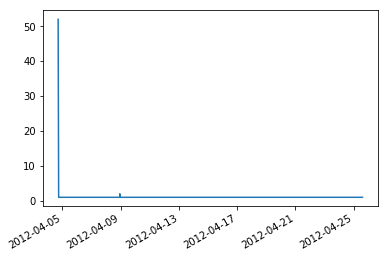

In [48]:
import matplotlib.pyplot as plt

# start from infect_time
filtered_df = df[df["InfectionTime"] >= infect_time]
filtered_df = filtered_df.drop_duplicates(subset=["User ID (anonymized)", "Iteration"], inplace=False, keep="first") 
filtered_df["InfectionTime"] = pd.to_datetime(filtered_df["InfectionTime"],unit='s')

fig, ax = plt.subplots()
newInfectionsList = filtered_df["InfectionTime"].value_counts().sort_index().plot(ax=ax)

# Uncomment to use parameters for changing x-axis and y-axis intervals
# graph.set_xlim(pd.Timestamp('2012-04-15'), pd.Timestamp('2013-01-11'))
# graph.set_ylim(0, 120)

fig.savefig('NewInfections.pdf')

## Line plot cumulative new infections over time

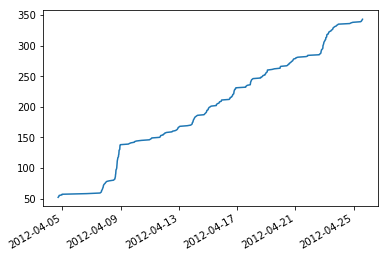

In [49]:
filtered_df = df[df["InfectionTime"] >= infect_time]
filtered_df = filtered_df.drop_duplicates(subset=["User ID (anonymized)", "Iteration"], inplace=False, keep="first") 
filtered_df["InfectionTime"] = pd.to_datetime(filtered_df["InfectionTime"],unit='s')

fig, ax = plt.subplots()

# Construct dataframe of infectionTime to it's frequency
infectionTime_freq_df = pd.DataFrame({"InfectionTime":filtered_df["InfectionTime"].value_counts().index})

cumulatedFrequencyList = filtered_df["InfectionTime"].value_counts().sort_index().cumsum().plot(ax=ax)
fig.savefig('CumulativeInfections.pdf')